# Coursework: Image Warping
### Visual Computing

This notebook contains exercises related to image warping, image stitching, non-linear distortions, image morphing, and real-time panorama stitching. Bonus questions are included with specific marks indicated.

**Grading Scheme (100 points total)**:

- **Affine Transformations**: 10 points
- **Homographies**: 10 points
- **Projective Transformations**: 10 points
- **Non-linear Distortions and Image Stitching**: 15 points
- **Image Warping and Interpolation**: 25 points
- **Panorama Stitching (Real-Time)**: 15 points
- **Image Morphing (Face morphing, scene transitions, etc.)**: 15 points




### 1. Affine Transformations- Recap (10 points)
Affine transformations map points between two planes while preserving lines and parallelism, but not necessarily angles. In this task, you will explore how affine transformations can be used to transform an image geometrically.
**Task:**
- Implement affine transformations to warp an image using a 2x3 transformation matrix.
- Apply the transformation matrix to change the geometry of the image, such as rotating, scaling, translating, or shearing.
- Visualize the original image and the transformed (warped) image to see how the transformation affects the image.

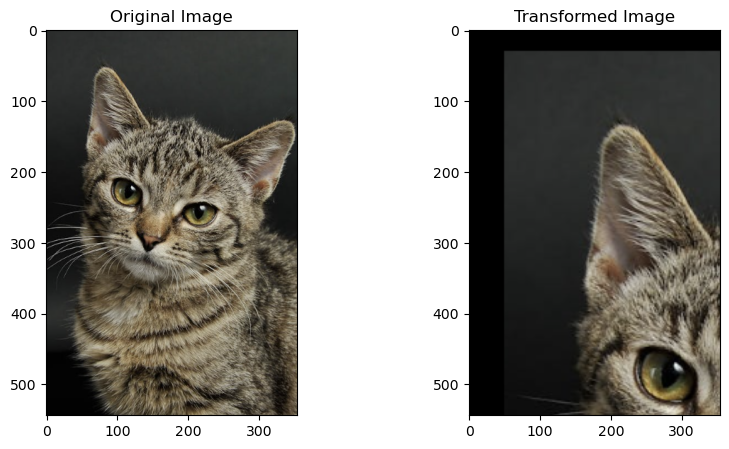

In [3]:
# Code for Affine Transformations here
# Implement the affine transformation function and visualization

# Code for Affine Transformations here
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("image1.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

transformation_matrix = np.float32([
    [2, 0, 50], 
    [0, 2, 30]
])

# Implement the affine transformation function and visualization

def apply_affine_transformation(image, transformation_matrix):
    shape = image.shape
    rows = shape[0]
    cols = shape[1]
    transformed_image = cv2.warpAffine(image, transformation_matrix, (cols, rows))
    return transformed_image

transformed_image = apply_affine_transformation(image, transformation_matrix)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(transformed_image)
plt.title("Transformed Image")

plt.show()

### 2. Homographies (5 points + 5 Bonus Points)
Homographies describe a more complex transformation that maps one plane to another, allowing for perspective effects and changes in shape that still preserve straight lines.

**Task:**
- Compute the homography matrix between two sets of corresponding points from two images.
- Apply the homography matrix to warp one image into the coordinate space of the other.
- Use feature detection (like ORB or SIFT) to automatically detect keypoints between the images and align them using the homography.

**Bonus Question (5 points):**
- Investigate how the number of corresponding points affects the accuracy of the homography. Explore what happens if fewer or more points are used and report your observations.

In [4]:

image1 = cv2.imread("image2.png", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("image3.png", cv2.IMREAD_GRAYSCALE)


orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(image1, None)
kp2, des2 = orb.detectAndCompute(image2, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = sorted(bf.match(des1, des2), key=lambda x: x.distance)

src_pts = np.float32([kp1[m.queryIdx].pt for m in matches])
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches])

# Investigate varying numbers of points
point_counts = [10, 20, 30, 40, 50, len(src_pts)] 
warped_images = []

for points in point_counts:
    indices = np.random.choice(len(src_pts), points, replace=False)
    sampled_src_pts = src_pts[indices]
    sampled_dst_pts = dst_pts[indices]
    H, _ = cv2.findHomography(sampled_src_pts, sampled_dst_pts, cv2.RANSAC)
    shape = image2.shape
    rows, cols = shape[0], shape[1]
    warped_img = cv2.warpPerspective(image1, H, (cols, rows))
    warped_images.append((points, warped_img))

plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
plt.title("Original Image 1")
plt.imshow(image1, cmap='gray')
plt.subplot(3, 3, 2)
plt.title("Original Image 2")
plt.imshow(image2, cmap='gray')

for i, (count, warped_img) in enumerate(warped_images, start=3):
    plt.subplot(3, 3, i)
    plt.title(f"Warped Image with {count} Points")
    plt.imshow(warped_img, cmap='gray')

plt.tight_layout()
plt.show()





[ WARN:0@21.622] global loadsave.cpp:241 findDecoder imread_('image2.png'): can't open/read file: check file path/integrity
[ WARN:0@21.623] global loadsave.cpp:241 findDecoder imread_('image3.png'): can't open/read file: check file path/integrity


ValueError: a must be greater than 0 unless no samples are taken

### 3. Projective Transformations (5 points + 5 Bonus Points)
Projective transformations allow us to map points from one plane to another, but with perspective distortion. This is commonly used in applications like perspective correction and image warping.

**Task:**
- Implement a projective transformation matrix and apply it to warp an image.
- Use this transformation to warp an image as if it is viewed from a different perspective.
- Experiment with multiple projective transformations to create different perspectives and analyze how the image is affected.

**Bonus Question (5 points):**
- Handle cases where the backward mapping (from the target image back to the source) falls outside the image bounds. Implement strategies like padding, extrapolation, or ignoring out-of-bounds pixels.

[ WARN:0@25.392] global loadsave.cpp:241 findDecoder imread_('364547.png'): can't open/read file: check file path/integrity


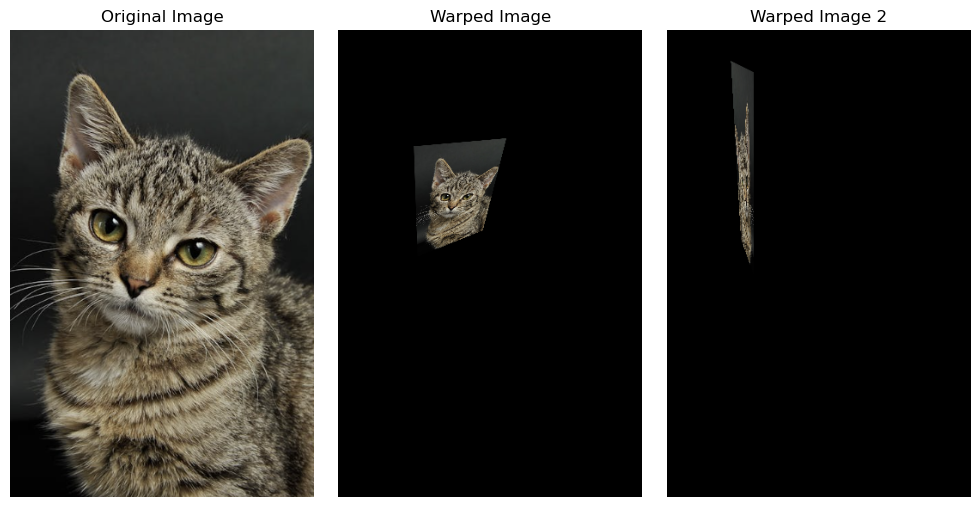

In [5]:
# Code for Projective Transformations here
# Implement projective transformation and handle backward mapping

image1 = cv2.imread("364547.png")
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

shape = image.shape
rows = shape[0]
cols = shape[1]

transformation_matrix = np.float32([
    [0.5, 0.1, cols // 4],
    [0.1, 0.5, rows // 4],
    [0.001, 0.001, 1]
])

transformation_matrix_2 = np.float32([
    [0, 0.2, 100], 
    [0, 1, 50],
    [0.001, 0.002, 1]
])

warped_image = cv2.warpPerspective(image, transformation_matrix, (cols, rows))
warped_image2 = cv2.warpPerspective(image, transformation_matrix_2, (cols, rows))

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Warped Image')
plt.imshow(warped_image)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Warped Image 2')
plt.imshow(warped_image2)
plt.axis('off')

plt.tight_layout()
plt.show()



### 4. Non-Linear Distortions and Image Stitching (15 points)
Non-linear distortions allow you to stretch, compress, or warp an image in non-uniform ways. Image stitching involves aligning multiple images and blending them together to create a larger, seamless composite.

**Task:**
- Apply non-linear distortions to an image, such as using a fisheye effect or other non-linear transformation.
- After experimenting with distortions, move to stitching two or more images together by finding corresponding points, aligning the images using a transformation, and blending them.
- For stitching, make sure to use blending techniques (such as linear blending or multi-band blending) to avoid visible seams where the images overlap.

(-0.5, 353.5, 543.5, -0.5)

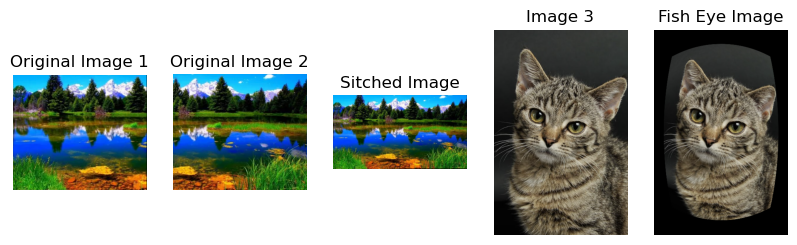

In [12]:

image4 = cv2.imread("modelinput1.png")
image5 = cv2.imread("modelinput2.png")

image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)
image5 = cv2.cvtColor(image5, cv2.COLOR_BGR2RGB)


def fishEyeEffect(image, k1, k2):
    height, width = image.shape[:2]
    center = (width / 2, height / 2)
    
    y, x = np.indices((height, width))
    xNorm = (x - center[0]) / width
    yNorm = (y - center[1]) / height

    rSq = xNorm**2 + yNorm**2
    xDistort = xNorm * (1 + k1 * rSq + k2 * rSq**2)
    yDistort = yNorm * (1 + k1 * rSq + k2 * rSq**2)
    xMapped = (xDistort * width + center[0]).astype(np.float32)
    yMapped = (yDistort * height + center[1]).astype(np.float32)
    distorted_image = cv2.remap(image, xMapped, yMapped, interpolation=cv2.INTER_LINEAR)

    return distorted_image


import cv2
import numpy as np

def stitchImages(img1, img2):
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(gray1, None)
    kp2, des2 = sift.detectAndCompute(gray2, None)

    flann = cv2.FlannBasedMatcher(dict(algorithm=1, trees=5), dict(checks=50))
    matches = flann.knnMatch(des1, des2, k=2)

    good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    height, width, _ = img2.shape
    warped_img1 = cv2.warpPerspective(img1, H, (width + img1.shape[1], height))
    stitched_image = np.copy(warped_img1)
    stitched_image[0:height, 0:width] = img2

    for x in range(width):
        if np.any(warped_img1[:, x] > 0):
            alpha = x / float(width)
            stitched_image[:, x] = cv2.addWeighted(warped_img1[:, x], alpha, img2[:, x], 1 - alpha, 0)

    gray = cv2.cvtColor(stitched_image, cv2.COLOR_BGR2GRAY)
    col_sum = np.sum(gray > 0, axis=0)
    last_non_black_col = np.max(np.where(col_sum > 0))
    stitched_image = stitched_image[:, :last_non_black_col + 1]

    return stitched_image

def removeRightBlackBar(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    col_sum = np.sum(gray > 0, axis=0)
    last_non_black_col = np.max(np.where(col_sum > 0))
    cropped_image = image[:, :last_non_black_col + 1]
    return cropped_image





warped_image = fishEyeEffect(image,k1=0.001, k2=5)
stitched_image = stitchImages(image4, image5)


plt.figure(figsize=(10, 5))


plt.subplot(1, 5, 1)
plt.title('Original Image 1')
plt.imshow(image5)
plt.axis('off')

plt.subplot(1, 5, 2)
plt.title('Original Image 2')
plt.imshow(image4)
plt.axis('off')


plt.subplot(1,5,3)
plt.title('Sitched Image')
plt.imshow(stitched_image)
plt.axis('off')

plt.subplot(1,5,4)
plt.title('Image 3')
plt.imshow(image)
plt.axis('off')

plt.subplot(1,5,5)
plt.title('Fish Eye Image')
plt.imshow(warped_image)
plt.axis('off')



### 5. Image Warping and Interpolation (20 points + 5 Bonus Points)
When warping images, pixel coordinates often map to non-integer values. Interpolation helps you estimate pixel values at these non-integer coordinates to avoid visual artifacts like pixelation or blurring.

**Task:**
- Implement nearest-neighbor interpolation to handle sub-pixel coordinates during image warping.
- Implement bilinear interpolation, a more advanced method, to provide smoother results.
- Compare the results of both interpolation techniques by warping the same image and observing the visual differences.

**Bonus Question (5 points):**
- How does interpolation affect the quality of stitched or warped images? Analyze how different interpolation methods can impact the final output and report your observations.

In [ ]:
# Code for Image Warping and Interpolation here
# Implement nearest-neighbor and bilinear interpolation and compare results

### 6. Panorama Stitching (Real-Time) (15 points)
Panorama stitching involves aligning and stitching together multiple images to create a single wide-angle composite. Real-time panorama stitching takes this a step further, allowing for immediate feedback and dynamic composition as more images are added.

**Task:**
- Implement real-time panorama stitching with multiple images.
- Use projective transformations to align images and blend them smoothly.
- Ensure that the stitched images have minimal visible seams and apply real-time adjustments as new images are added.

**HINT:**
 You can explore techniques like feathering, linear blending, or multi-band blending for better panaromas.

In [ ]:
# Code for Real-Time Panorama Stitching here
# Implement real-time panorama stitching and experiment with blending techniques

### 7. Image Morphing (Face Morphing, Scene Transitions) (15 points)
Image morphing is the process of smoothly transitioning from one image to another by combining both geometric warping and cross-dissolving (blending). Common applications include face morphing and smooth transitions between scenes in videos or graphics.

**Task:**
- Morph between two faces or two scenes by first geometrically warping the images so that key features align.
- Use blending techniques to create a smooth transition from one image to another. Ensure that the transition looks gradual and natural, without sudden jumps or artifacts.
- Consider experimenting with intermediate steps to control the pace of the morphing effect.

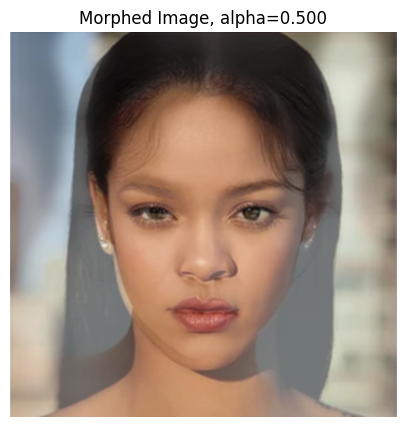

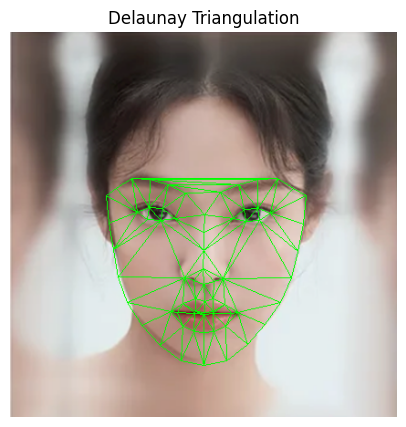

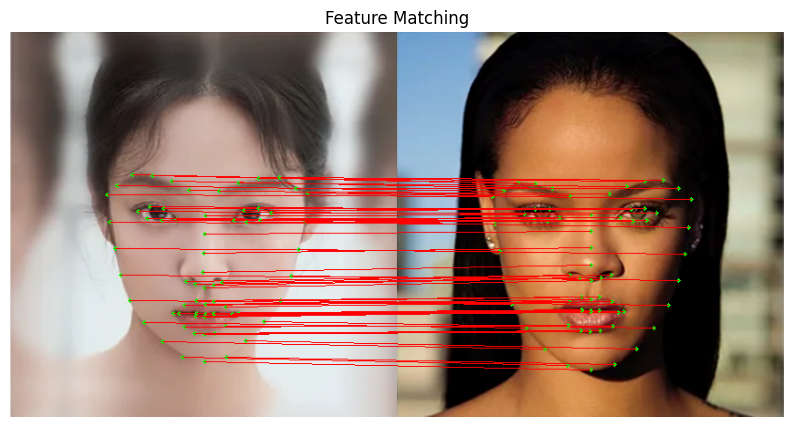

In [39]:
# Code for Image Morphing here
# Implement image morphing between two images with warping and blending

### PLEASE note that numpy had to be downgraded to a 1.x version since 2.x and above breaks dlib and its face detector and predictor
### otherwise this implementation will NOT work

import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
from imutils import face_utils
from scipy.spatial import Delaunay

def detect_face_landmarks(image):
    #initialise dlib face detector and predictor
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

    #turns image gray
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #detect faces
    faces = detector(gray)

    if len(faces) == 0:
        return None
    
    #actually find landmarks
    landmarks = predictor(gray, faces[0])
    #return numpy array of (x, y) coordinates for each landmark
    return np.array([(p.x, p.y) for p in landmarks.parts()])

def warp_triangle(img1, img2, t1, t2):
    #get the bounding rectangle between the two triangles
    r1 = cv2.boundingRect(np.float32([t1]))
    r2 = cv2.boundingRect(np.float32([t2]))

    #offset the points to be at the top left of the rectangle for affine transformation
    t1_offset = [(pt[0] - r1[0], pt[1] - r1[1]) for pt in t1]
    t2_offset = [(pt[0] - r2[0], pt[1] - r2[1]) for pt in t2]

    M = cv2.getAffineTransform(np.float32(t1_offset), np.float32(t2_offset))

    #extract region of first image
    img1_cropped = img1[r1[1]:r1[1]+r1[3], r1[0]:r1[0]+r1[2]]

    #transform region from first image into bounding rectangle of the second triangle
    img2_cropped = cv2.warpAffine(img1_cropped, M, (r2[2], r2[3]))

    #creates an empty mask and fills it with the triangle shape, then uses that to isolate only the triangle in the bounded rectangle
    mask = np.zeros((r2[3], r2[2]), dtype=np.uint8)
    cv2.fillConvexPoly(mask, np.int32(t2_offset), 255)
    img2_cropped = cv2.bitwise_and(img2_cropped, img2_cropped, mask=mask)

    #finally adding this triangle to the new image
    img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] = cv2.add(img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]], img2_cropped)


def blend_images(img1, img2, alpha):
    return cv2.addWeighted(img1, 1 - alpha, img2, alpha, 0)

def face_morph(image1, image2, alpha):
    landmarks1 = detect_face_landmarks(image1)
    landmarks2 = detect_face_landmarks(image2)

    #delaunay triangulation
    average_landmarks = (landmarks1 + landmarks2) / 2
    triangles = Delaunay(average_landmarks)

    intermediate_image = np.zeros_like(face1)

    for triangle in triangles.simplices:
        #takes each point for every triangle in both images
        t1 = [landmarks1[i] for i in triangle]
        t2 = [landmarks2[i] for i in triangle]

        #finds the intermediate position between the each point using the same weighting as the cross dissolve
        t_intermediate = [(1 - alpha) * np.array(t1[i]) + alpha * np.array(t2[i]) for i in range(3)]

        #warps the triangles from both image1 and image2 into the intermediate image
        warp_triangle(image1, intermediate_image, t1, t_intermediate)
        warp_triangle(image2, intermediate_image, t2, t_intermediate)
    return blend_images(image1, image2, alpha)

face1 = cv2.imread('image1.png')
face2 = cv2.imread('image2.png')
alpha = 0.5

morphed_image = face_morph(face1, face2, alpha)

plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(morphed_image, cv2.COLOR_BGR2RGB))
plt.title('Morphed Image, alpha=%1.3f' % alpha)
plt.axis('off')
plt.show()

#
#
#
#
#
#everything from here is for TESTING purposes only
show_testing = True #change variable to True to show test results
show_steps = False #change variable to True to show different values for alpha
step = 10
if show_steps:
    for alpha in np.linspace(0, 1, step):
        morphed_image = face_morph(face1, face2, alpha)
        plt.figure(figsize=(10, 5))
        plt.imshow(cv2.cvtColor(morphed_image, cv2.COLOR_BGR2RGB))
        plt.title('Morphed Image, alpha=%1.3f' % alpha)
        plt.axis('off')
        plt.show()

if show_testing:
    face1 = cv2.cvtColor(face1, cv2.COLOR_BGR2RGB)
    face2 = cv2.cvtColor(face2, cv2.COLOR_BGR2RGB)

    ###visualising delaunay triangulation
    landmarks1 = detect_face_landmarks(face1)
    landmarks2 = detect_face_landmarks(face2)

    average_landmarks = (landmarks1 + landmarks2) / 2
    tri = Delaunay(average_landmarks)

    delaunay_face = np.copy(face1)

    for simplex in tri.simplices:
        pts = average_landmarks[simplex]
        pts = pts.astype(np.int32)
        cv2.polylines(delaunay_face, [pts], isClosed=True, color=(0, 255, 0), thickness=1)

    plt.figure(figsize=(10, 5))
    plt.imshow(delaunay_face)
    plt.title("Delaunay Triangulation")
    plt.axis('off')
    plt.show()


    ###visualising feature matching
    #put images side by side
    matched_features = np.hstack((face1, face2))
    
    #draw landmarks on both images
    for i in range(len(landmarks1)):
        #first image
        pt1 = landmarks1[i]
        cv2.circle(matched_features, (pt1[0], pt1[1]), 2, (0, 255, 0), -1)
        
        #second image (offsetting by width of first image)
        pt2 = landmarks2[i]
        pt2_offset = (pt2[0] + face1.shape[1], pt2[1])
        cv2.circle(matched_features, pt2_offset, 2, (0, 255, 0), -1)
        
        #connect each point
        cv2.line(matched_features, (pt1[0], pt1[1]), pt2_offset, (255, 0, 0), 1)

    #matched_features = match_features(face1, face2)
    plt.figure(figsize=(15, 5))
    plt.imshow(matched_features)
    plt.title("Feature Matching")
    plt.axis('off')
    plt.show()
